# Python统计分析

## 第一节: 描述性统计分析

### 1. 基本统计学概念


* 统计量


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import os

In [2]:
os.chdir(r'E:\云开明培训机构\云开见明培训课件\data summary\第五章') #修改文件所在路径

* 数据集的字段：年龄、性别、身体质量指数、孩子、吸烟者、保险费用、保险索赔
* 保险的索赔数据

In [3]:
#读取数据
insurance = pd.read_csv("insurance2.csv",sep=',',encoding= 'utf-8',dtype={'sex':str})

In [4]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
# 查看年龄相关情况
# 统计均值，中位数，标准差，分位数情况

In [6]:
insurance['age'].mean()

39.20702541106129

In [7]:
insurance['age'].median()

39.0

In [8]:
insurance['age'].std()

14.049960379216172

In [9]:
insurance['age'].quantile([0.01,0.50,0.99]) # 1%和99%分位数

0.01    18.0
0.50    39.0
0.99    64.0
Name: age, dtype: float64

In [10]:
stats.scoreatpercentile(insurance['age'].values,(10,20,30,40,50)) #计算分位点的分位数

E:\Python\Python3.7\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


array([19., 24., 29., 34., 39.])

In [11]:
insurance['age'].mode() #计算众数

0    18
dtype: int64

* 离散程度

In [12]:
print('极差为%.2f:'% (insurance['age'].max() - insurance['age'].min()))

极差为46.00:


In [13]:
# 四分位差
Q75_25 = insurance['age'].quantile(0.75) - insurance['age'].quantile(0.25)
print('四分位差为%.2f:'% Q75_25)

四分位差为24.00:


In [14]:
# 方差
print('方差为%.3f和标准差为%.3f: ' % (insurance['age'].var(), insurance['age'].std()))

方差为197.401和标准差为14.050: 


In [15]:
# 变异系数
cv = insurance['age'].std()/insurance['age'].mean()
print('标准差为%.3f:'% cv)

标准差为0.358:


* 变异系数
* 当需要比较两组数据离散程度大小的时候，如果两组数据的测量尺度相差太大，
或者数据量纲的不同，直接使用标准差来进行比较不合适，此时就应当消除测量尺度和量纲的影响，
而变异系数可以做到这一点，它是原始数据标准差与原始数据平均数的比。CV没有量纲，这样就可以进行客观比较了

### 2. 点估计和区间估计

In [16]:
# 点估计
# 年龄
charges_mean = np.mean(insurance['charges'])

In [17]:
se = stats.sem(insurance['charges']) #样本均值的标准误

In [18]:
interval = stats.norm.interval(0.95,charges_mean ,se)  #96%置信水平的区间

In [19]:
print (' 保险费用的区间估计为: %.3f到%.3f之间' % interval)

 保险费用的区间估计为: 12621.542到13919.303之间


* 连续型变量和分类变量的统计量

In [20]:
insurance['age'].describe()# 连续型变量一般用均值，中位数等

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [21]:
insurance['age'].quantile([0.1,0.2,0.5,0.99])

0.10    19.0
0.20    24.0
0.50    39.0
0.99    64.0
Name: age, dtype: float64

In [22]:
insurance['sex'].describe()

count     1338
unique       2
top          1
freq       676
Name: sex, dtype: object

In [23]:
insurance['sex'].mode() #众数有可能不止一个

0    1
dtype: object

## 第二节: 假设检验

### 1. 假设检验与单样本t检验

In [24]:
insurance['age'].mean()

39.20702541106129

In [25]:
import statsmodels.api as sm
# t检验(用于小样本总体方差未知)
d1 = sm.stats.DescrStatsW(insurance['age'])
#假设为0.1
print('t检验= %6.4f,p-value=%6.4f, df=%s' % d1.ttest_mean(18))

t检验= 55.2119,p-value=0.0000, df=1337.0


In [26]:
#显著性水平远远小于0.05，拒绝原假设

In [27]:
# 使用Z检验（大样本总体方差已知或者未知，或者小样本总体方差已知
print ('z-statistics = %6.4f, p-value=%6.4f' % d1.ztest_mean(18))

z-statistics = 55.2119, p-value=0.0000


### 2. 双样本t检验

In [28]:
creditcard_exp = pd.read_csv('creditcard_exp.csv',skipinitialspace=True)

In [29]:
creditcard_exp.head(10)

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
0,19,1,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,1600,0.102361,3
1,5,1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,1024,0.051184,2
2,95,0,NaN,NaN,1,36,8.40000,0,0,88.61,7.490000,1296,0.910000,1
3,86,1,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,1681,0.197218,3
4,50,1,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,784,0.062676,2
5,67,1,816.03,6.704451,1,41,10.03015,0,1,119.76,10.332263,1681,-0.302113,3
6,97,1,1151.15,7.048517,1,33,11.70575,1,0,38.90,11.526053,1089,0.179697,3
7,38,1,1233.77,7.117830,1,37,11.81885,1,0,61.05,12.490895,1369,-0.672045,3
8,100,1,802.52,6.687757,1,46,9.31260,1,0,58.74,9.053263,2116,0.259337,2
9,30,1,2167.77,7.681454,1,40,16.28885,1,0,157.90,17.056684,1600,-0.767834,3


In [30]:
creditcard_exp['avg_exp'].groupby(creditcard_exp['gender']).describe().T

gender,0,1
count,50.000000,20.000000
mean,925.705200,1128.531000
std,430.833365,462.281389
min,163.180000,648.150000
25%,593.312500,829.860000
50%,813.650000,1020.005000
75%,1204.777500,1238.202500
max,1992.390000,2430.030000


In [31]:
#先进性方差齐性检验
gender0 = creditcard_exp[creditcard_exp['gender'] ==0]['avg_exp']
gender1 = creditcard_exp[creditcard_exp['gender'] ==1]['avg_exp']
leveneTestRes = stats.levene(gender0,gender1)

E:\Python\Python3.7\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
E:\Python\Python3.7\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
E:\Python\Python3.7\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
E:\Python\Python3.7\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [32]:
print('w-value=%6.4f,p-value=%6.4f' % leveneTestRes)

w-value=   nan,p-value=   nan


In [33]:
#进行双样本t检验
print(stats.stats.ttest_ind(gender0, gender1,equal_var=True))

Ttest_indResult(statistic=nan, pvalue=nan)


## 第三节: 卡方检验和方差分析


### 1. 方差分析


* 分类变量和连续性变量关系检验

In [34]:
insurance = pd.read_csv("insurance2.csv",sep=',',encoding= 'utf-8',dtype={'sex':str})

In [35]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [36]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

* 单因素方差分析

In [37]:
model = ols('charges ~C(children)',data = insurance.dropna()).fit()

In [38]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(children),5.0,2.396917e+09,4.793833e+08,3.29692,0.005786
Residual,1332.0,1.936773e+11,1.454034e+08,NaN,NaN


* 多因素方差分析

In [39]:
model = ols('charges ~C(children) + C(sex) + C(region) ',data = insurance.dropna()).fit()

In [40]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(children),5.0,2.396917e+09,4.793833e+08,3.322368,0.005489
C(sex),1.0,6.412588e+08,6.412588e+08,4.444247,0.035206
C(region),3.0,1.419384e+09,4.731280e+08,3.279015,0.020303
Residual,1328.0,1.916167e+11,1.442897e+08,NaN,NaN


### 2.  卡方检验

* 卡方检验主要用于分析两个分类变量之间的关系,其中有一个必须是二分类
* 只能检验两个变量是否相关，不能检验强弱

In [41]:
insurance = pd.read_csv("insurance2.csv",sep=',',encoding= 'utf-8',dtype={'sex':str})

In [42]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [43]:
#  检验保险索赔和孩子的数量是否相关

In [44]:
cross_table = pd.crosstab(insurance.children,columns=insurance.insuranceclaim,margins=True)

In [45]:
cross_table

insuranceclaim,0,1,All
children,,,
0,111,463,574
1,151,173,324
2,146,94,240
3,112,45,157
4,21,4,25
5,14,4,18
All,555,783,1338


In [46]:
#卡方检验
stats.chi2_contingency(cross_table)

(242.5191362618915,
 4.956407582493133e-45,
 12,
 array([[ 238.0941704 ,  335.9058296 ,  574.        ],
        [ 134.39461883,  189.60538117,  324.        ],
        [  99.55156951,  140.44843049,  240.        ],
        [  65.12331839,   91.87668161,  157.        ],
        [  10.36995516,   14.63004484,   25.        ],
        [   7.46636771,   10.53363229,   18.        ],
        [ 555.        ,  783.        , 1338.        ]]))

In [47]:
print('卡方值为: %.3f和P值为: %.3f' % (stats.chi2_contingency(cross_table)[0],stats.chi2_contingency(cross_table)[1]) )

卡方值为: 242.519和P值为: 0.000


In [48]:
cross_table_rowpct = pd.crosstab(insurance.children,columns = insurance.insuranceclaim,normalize = 'index')

In [49]:
cross_table_rowpct

insuranceclaim,0,1
children,,
0,0.193380,0.806620
1,0.466049,0.533951
2,0.608333,0.391667
3,0.713376,0.286624
4,0.840000,0.160000
5,0.777778,0.222222


## 第四节: 相关分析


## 1. Pearson相关系数


In [50]:
insurance = pd.read_csv("insurance2.csv",sep=',',encoding= 'utf-8',dtype={'sex':str})

In [51]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


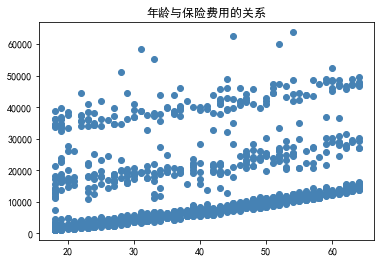

In [52]:
#画图
import matplotlib.pyplot as plt
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.scatter(x= insurance.age,y=insurance.charges,c = 'steelblue')
plt.title('年龄与保险费用的关系')
plt.show()

In [53]:
corr_pear = insurance[['age','charges']].corr(method='pearson')

In [54]:
corr_pear.loc['age','charges']

0.2990081933306478

In [55]:
print('年龄和保险费用的皮尔森相关系数为: %.3f' % corr_pear.loc['age','charges'])

年龄和保险费用的皮尔森相关系数为: 0.299


### 2. 斯皮尔曼相关系数

In [56]:
corr_spearman = insurance[['age','charges']].corr(method='spearman')

In [57]:
corr_spearman

,age,charges
age,1.000000,0.534392
charges,0.534392,1.000000


In [58]:
print('年龄和保险费用的斯皮尔曼相关系数为: %.3f' % corr_spearman.loc['age','charges'])

年龄和保险费用的斯皮尔曼相关系数为: 0.534


### 3. kendall相关系数

* 主要用于衡量两个变量间非线性关系比较好,更多的用于有序性分类变量

In [59]:
corr_kendall = insurance[['age','charges']].corr(method='kendall')

In [60]:
corr_kendall 

,age,charges
age,1.000000,0.475302
charges,0.475302,1.000000


In [61]:
print('年龄和保险费用的kendall关系数为: %.3f' % corr_kendall.loc['age','charges'])

年龄和保险费用的kendall关系数为: 0.475


* 散点图矩阵
* 用来展示两连续性变量的相关性强弱的

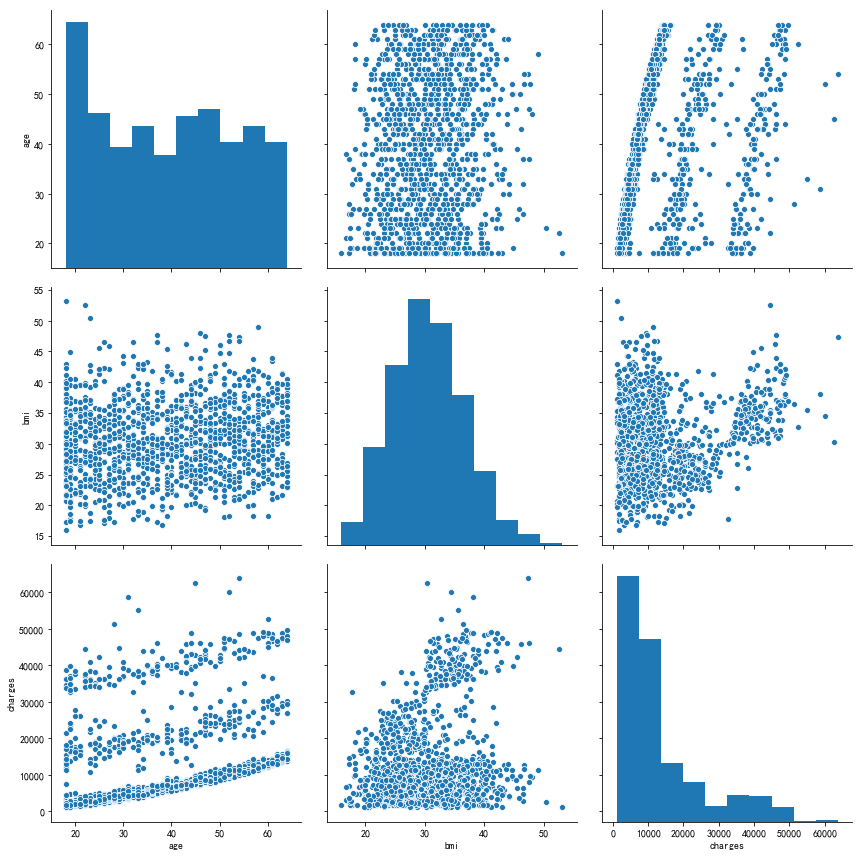

In [63]:
import seaborn as sns
sns.pairplot( insurance[['age','bmi','charges']],height = 4)
plt.show()